In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
%matplotlib inline
import skimage   


from skimage import io


from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import BatchNormalization
import pathlib
from sklearn.metrics import confusion_matrix






from google.colab import drive
from PIL import Image



In [ ]:


drive.mount('/content/drive')
data_dir = pathlib.Path("/content/drive/MyDrive/DDATASET")

def get_imlist(path):
# Returns a list of filenames for all tif images in a directory. 
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.bmp')]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


data_dir = pathlib.Path(data_dir)


image_count = len(list(data_dir.glob('*/*.bmp')))
print('Files are downlownloaded in ', data_dir)
print('Total images ',image_count)



Files are downlownloaded in  /content/drive/MyDrive/DDATASET
Total images  6540


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6540 files belonging to 2 classes.
Using 5232 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6540 files belonging to 2 classes.
Using 1308 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)
num_classes=2

['Irregular', 'Standard']


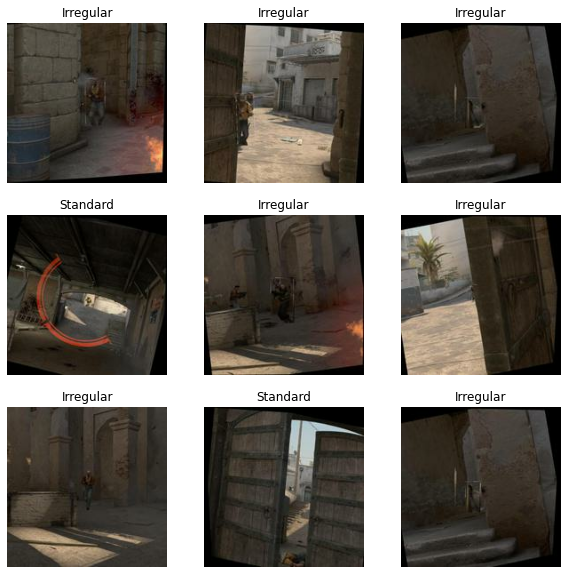

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE # if you get an error turn this statement off

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=-1)
val_ds = val_ds.cache().prefetch(buffer_size=-1)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [ ]:
# (train_images, train_labels),(test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data
# print(train_images.shape)
# print(train_labels.shape)
# print(test_images.shape)
# print(test_labels.shape)
training = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(180, 180),
  batch_size=5232)

testing = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(180, 180),
  batch_size=1308)
normalized_ds = training.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 
for image_batch, labels_batch in training:
  train_images=image_batch.numpy()
  train_labels=labels_batch.numpy()
  break


Found 6540 files belonging to 2 classes.
Using 5232 files for training.
Found 6540 files belonging to 2 classes.
Using 1308 files for validation.
0.0 0.9960785


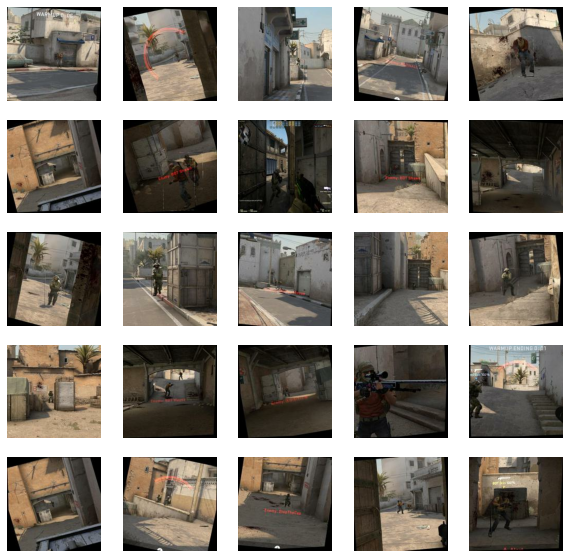

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
# test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 
from skimage.metrics import structural_similarity as ssim
pyplot.figure(figsize=(10,10))

# plot images from the training dataset
for i in range(25):
    # define subplot
    pyplot.subplot(5, 5, 1 + i)
    pyplot.axis('off')
    # plot raw pixel data. We have reversed the colours for viewing purposes
    pyplot.imshow(train_images[i].astype(np.uint8))
pyplot.show()



In [ ]:

train_images = train_images.astype('float32')

#print(train_images[0])
print(train_images.shape)

#Normalize images between 0 & 1
train_images = train_images / 255
#print(train_images[0])

(5232, 180, 180, 3)


In [ ]:
coding_size = (180*180,)


generator = Sequential()
generator.add(Dense(100,activation = 'selu',input_shape=coding_size))
generator.add(Dense(150,activation = 'selu'))
generator.add(Dense(180*180*3,activation = 'sigmoid'))
generator.add(Reshape([180,180,3]))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3240100   
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 97200)             14677200  
                                                                 
 reshape (Reshape)           (None, 180, 180, 3)       0         
                                                                 
Total params: 17,932,450
Trainable params: 17,932,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [180,180,3]))
discriminator.add(Dense(150,activation = 'selu'))
discriminator.add(Dense(100,activation = 'selu'))
#Set activation to sigmoid as discriminator decides if an image is real or fake
discriminator.add(Dense(1,activation = "sigmoid"))

In [ ]:
gan = Sequential([generator,discriminator])

In [ ]:
#Setting how loss on backpropogation would be calculated
discriminator.compile(loss = "binary_crossentropy", optimizer = "rmsprop")
#we would set discriminator trainable to false as it is not trained in the second phase
discriminator.trainable = False
gan.compile(loss = "binary_crossentropy" , optimizer = "rmsprop")

In [ ]:
batch_size = 32

# process all data in batches of size 32 will be created from 6540 images
dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(1000)
dataset = dataset.batch(batch_size,drop_remainder = True)


In [ ]:
def train_gan(gan,dataset,batch_size,coding_size, n_epoch = 1):
    #Access objects in GAN network in sequence
    generator, discriminator = gan.layers
    
    for epoch in range(n_epoch):
        for X_row in dataset:
            
            #PHASE 1 : Train the discriminator
            
            #we will assume that pixels values are normally distributed
            noise = tf.random.normal(shape = [batch_size,180*180])
            generated_images = generator(noise)
            # concatenate the real images stored in X_row and fake images 
            fake_real_image = tf.concat([generated_images,X_row],axis = 0)
            # set targer 1 for real image and 0 for fake image
            target = tf.constant([[0.]]*batch_size + [[1.]]*batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(fake_real_image,target)
            
            
            #PHASE 2: Train the Generator
            
            noise = tf.random.normal(shape = [batch_size,180*180])
            #we set target2 to 1. as we want the discriminator to believe the fake images are real
            target2 = tf.constant([[1.]]*batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, target2)
            
    return generated_images
            

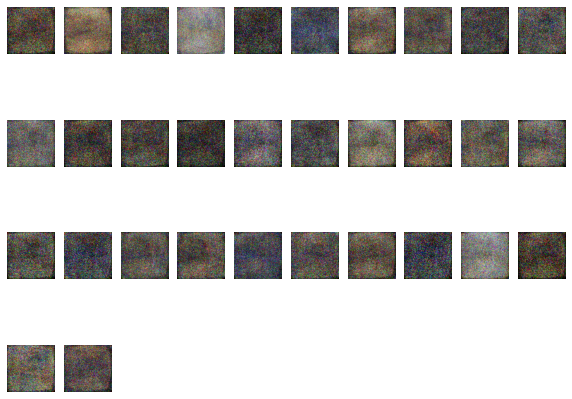

In [ ]:
gen_images = train_gan(gan,dataset,batch_size,coding_size,n_epoch = 100) 
pyplot.figure(figsize=(10,10))
# plot images from the training dataset
for i in range(gen_images.shape[0]):
    # define subplot
    pyplot.subplot(5 ,10, 1 + i)
    pyplot.axis('off')
    # plot raw pixel data. We have reversed the colours for viewing purposes
    pyplot.imshow(gen_images[i], cmap='gray_r')
pyplot.show()


keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 128)       147584    
                                                        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


164/164 [==============================] - 103s 538ms/step - loss: 4.5612 - accuracy: 0.2741 - val_loss: 0.8288 - val_accuracy: 0.5031
Epoch 2/100
164/164 [==============================] - 34s 207ms/step - loss: 0.7292 - accuracy: 0.4939 - val_loss: 0.7339 - val_accuracy: 0.4969
Epoch 3/100
164/164 [==============================] - 34s 208ms/step - loss: 0.7095 - accuracy: 0.4924 - val_loss: 0.7025 - val_accuracy: 0.5031
Epoch 4/100
164/164 [==============================] - 34s 207ms/step - loss: 0.7139 - accuracy: 0.4958 - val_loss: 0.6978 - val_accuracy: 0.5031
Epoch 5/100
164/164 [==============================] - 34s 207ms/step - loss: 0.7067 - accuracy: 0.4966 - val_loss: 0.7099 - val_accuracy: 0.4969
Epoch 6/100
164/164 [==============================] - 34s 208ms/step - loss: 0.7016 - accuracy: 0.4893 - val_loss: 0.6996 - val_accuracy: 0.5031
Epoch 7/100
164/164 [==============================] - 34s 206ms/step - loss: 0.7028 - accuracy: 0.4885 - val_loss: 0.6958 - val_accura

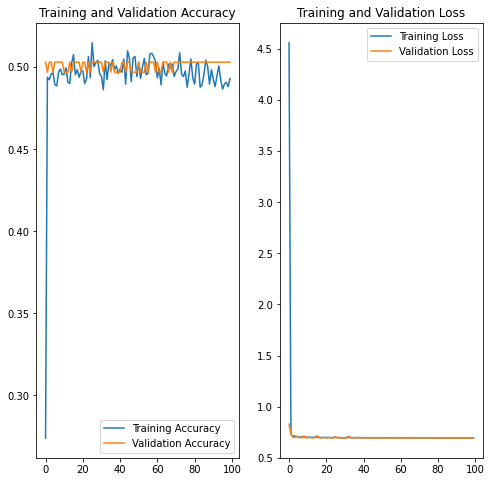

In [ ]:



#model from literature 1 - Qassim et al VGG16

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(1024, activation='softmax')
  

  
   
   
])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()





In [ ]:


from sklearn.metrics import confusion_matrix
 
preds = model.predict(val_ds)  # each row contains probability of the class
y_pred = np.argmax(preds,axis=-1)  # pick up the highest probability  and assign the class number
 
true_categories = np.concatenate([y for x, y in val_ds], axis=0)  # fetch true labels for each image
 

confusion = confusion_matrix(true_categories, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_categories, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(true_categories, y_pred, average='weighted')))

Confusion Matrix

[[  0 650]
 [  0 658]]

Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.25
Macro Recall: 0.50
Macro F1-score: 0.33

Weighted Precision: 0.25
Weighted Recall: 0.50
Weighted F1-score: 0.34


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


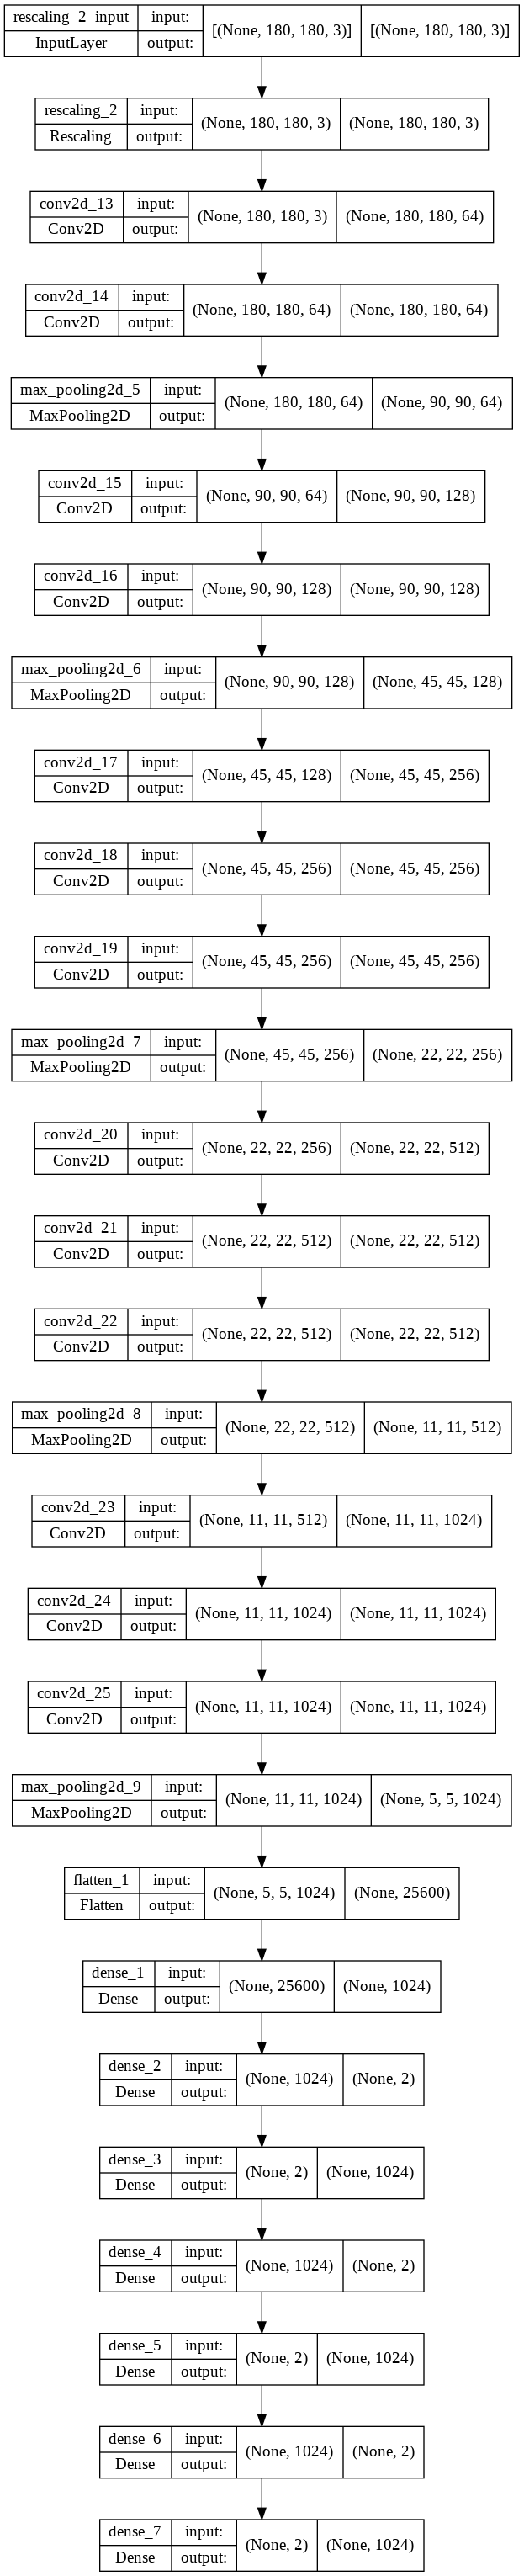

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        18464     
                                                                 
 conv2d_29 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


164/164 [==============================] - 67s 387ms/step - loss: 8.4123 - accuracy: 0.0476 - val_loss: 1.6849 - val_accuracy: 0.0000e+00
Epoch 2/100
164/164 [==============================] - 63s 379ms/step - loss: 1.4025 - accuracy: 0.0659 - val_loss: 1.1961 - val_accuracy: 0.5031
Epoch 3/100
164/164 [==============================] - 63s 379ms/step - loss: 1.0795 - accuracy: 0.4534 - val_loss: 0.9810 - val_accuracy: 0.5031
Epoch 4/100
164/164 [==============================] - 63s 379ms/step - loss: 0.9191 - accuracy: 0.4962 - val_loss: 0.8487 - val_accuracy: 0.4969
Epoch 5/100
164/164 [==============================] - 63s 381ms/step - loss: 0.7757 - accuracy: 0.5019 - val_loss: 0.7283 - val_accuracy: 0.4969
Epoch 6/100
164/164 [==============================] - 63s 380ms/step - loss: 0.7330 - accuracy: 0.5019 - val_loss: 0.7027 - val_accuracy: 0.4969
Epoch 7/100
164/164 [==============================] - 63s 379ms/step - loss: 0.7078 - accuracy: 0.5034 - val_loss: 0.7025 - val_acc

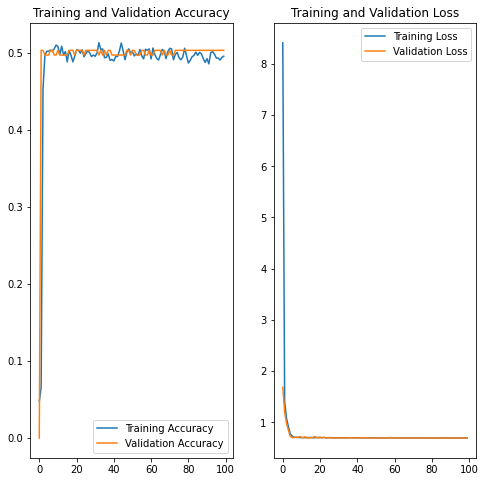

In [ ]:
#model from literature 2 - Zheng et al YoloV3 variant

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
 
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
 
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  
  

  layers.Flatten(),
  layers.Dense(1024, activation='relu'),
  layers.Dense(num_classes),
  layers.Dense(1024, activation='softmax')
  

 
 
])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()



In [ ]:


from sklearn.metrics import confusion_matrix
 
preds = model.predict(val_ds)  # each row contains probability of the class
y_pred = np.argmax(preds,axis=-1)  # pick up the highest probability  and assign the class number
 
true_categories = np.concatenate([y for x, y in val_ds], axis=0)  # fetch true labels for each image
 

confusion = confusion_matrix(true_categories, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_categories, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(true_categories, y_pred, average='weighted')))

Confusion Matrix

[[  0 650]
 [  0 658]]

Accuracy: 0.50

Micro Precision: 0.50
Micro Recall: 0.50
Micro F1-score: 0.50

Macro Precision: 0.25
Macro Recall: 0.50
Macro F1-score: 0.33

Weighted Precision: 0.25
Weighted Recall: 0.50
Weighted F1-score: 0.34


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


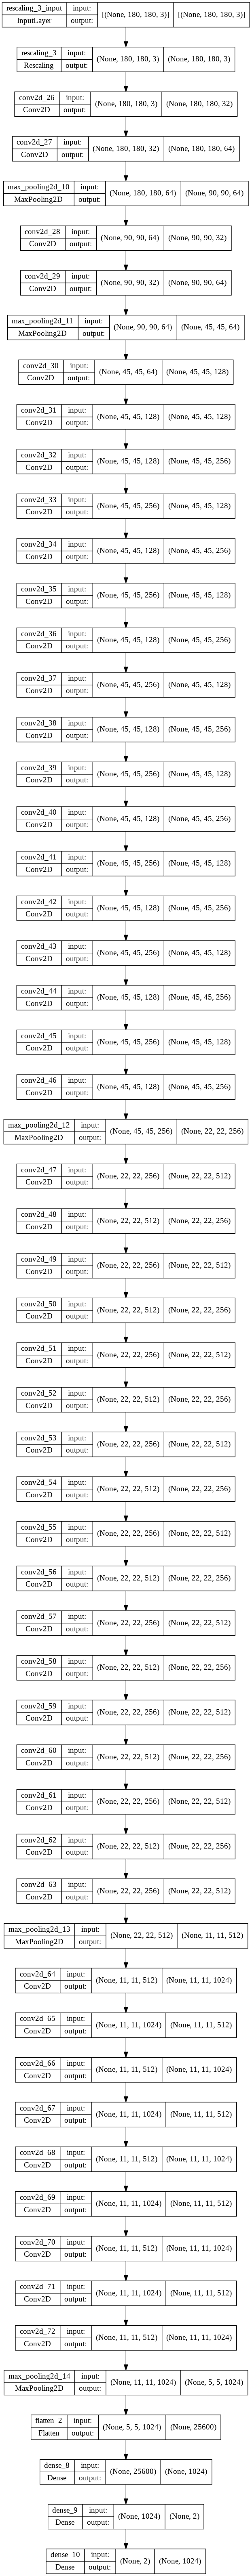

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0

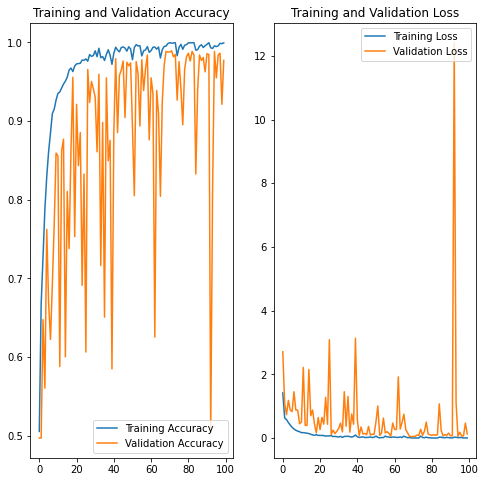

In [ ]:
#model from literature 3 - Badrinarayanan et al SegNet

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # encoder
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),



  # decoder
  layers.UpSampling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),


  layers.Flatten()
  
   
   
])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()




In [ ]:


# from sklearn.metrics import confusion_matrix
 
# preds = model.predict(val_ds)  # each row contains probability of the class
# y_pred = np.argmax(preds,axis=-1)  # pick up the highest probability  and assign the class number
 
# true_categories = np.concatenate([y for x, y in val_ds], axis=0)  # fetch true labels for each image
 

# confusion = confusion_matrix(true_categories, y_pred)
# print('Confusion Matrix\n')
# print(confusion)

# #importing accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_categories, y_pred)))

# print('Micro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='micro')))
# print('Micro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='micro')))
# print('Micro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='micro')))

# print('Macro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='macro')))
# print('Macro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='macro')))
# print('Macro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='macro')))

# print('Weighted Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='weighted')))
# print('Weighted Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='weighted')))
# print('Weighted F1-score: {:.2f}'.format(f1_score(true_categories, y_pred, average='weighted')))

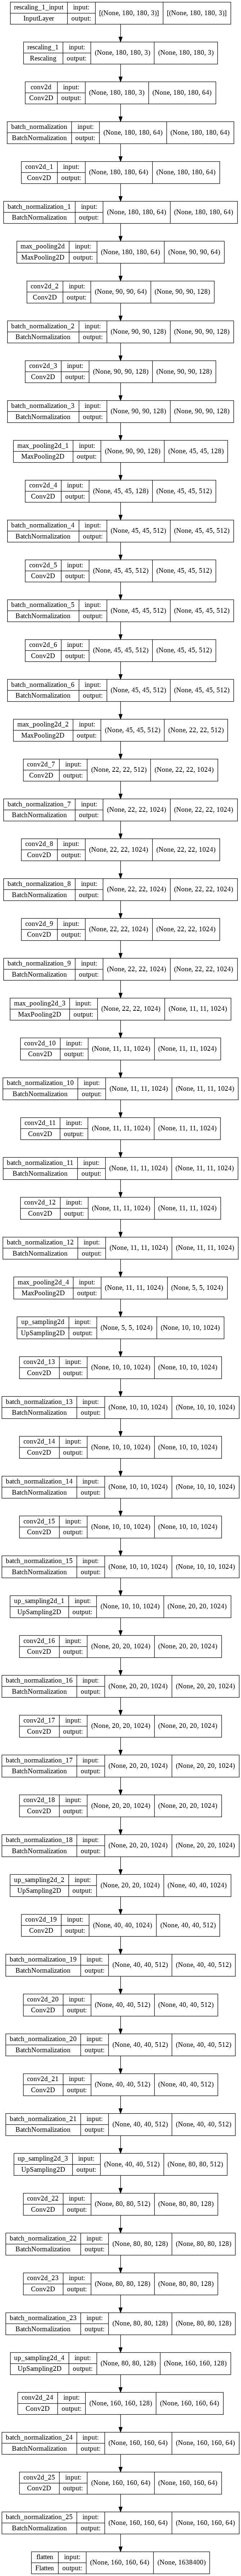

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 90, 90, 128)      5

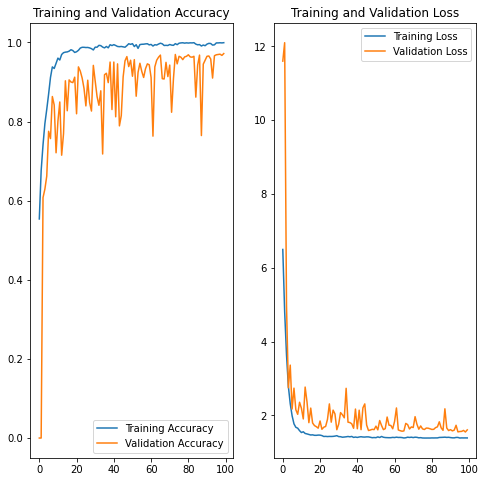

In [ ]:


#model from literature 4 - Fang et al Tinier-YOLO

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),


  layers.Conv2D(256, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),

  layers.Conv2D(512, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),


  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),

  layers.Conv2D(1024, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),


  



  layers.Flatten()
  
  
   
   
])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()




In [ ]:


from sklearn.metrics import confusion_matrix
 
preds = model.predict(val_ds)  # each row contains probability of the class
y_pred = np.argmax(preds,axis=-1)  # pick up the highest probability  and assign the class number
 
true_categories = np.concatenate([y for x, y in val_ds], axis=0)  # fetch true labels for each image
 

confusion = confusion_matrix(true_categories, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_categories, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(true_categories, y_pred, average='weighted')))

Confusion Matrix

[[631  17   2]
 [ 18 640   0]
 [  0   0   0]]

Accuracy: 0.97

Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97

Macro Precision: 0.65
Macro Recall: 0.65
Macro F1-score: 0.65

Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


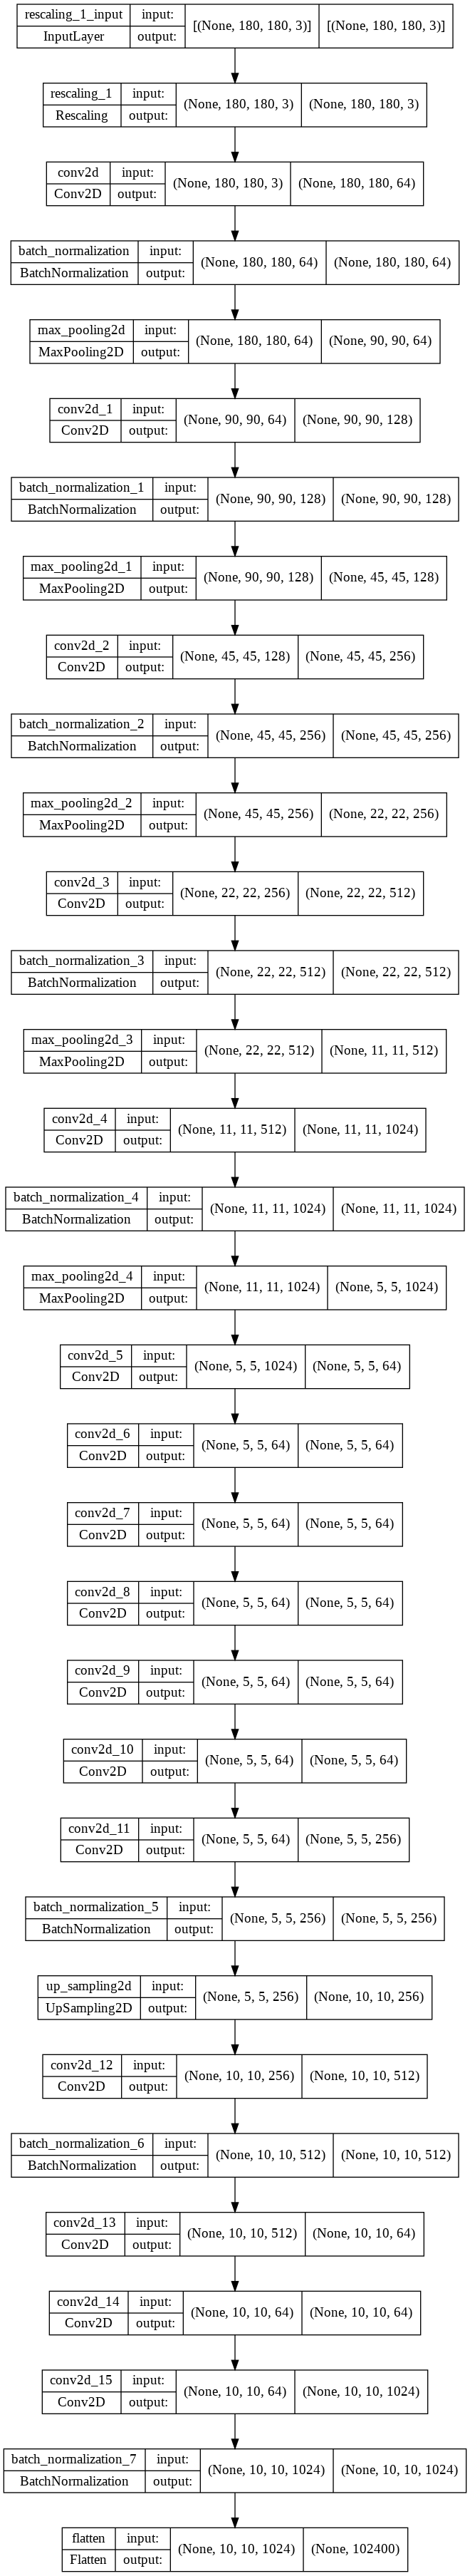

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_8 (Batc  (None, 180, 180, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 128)      

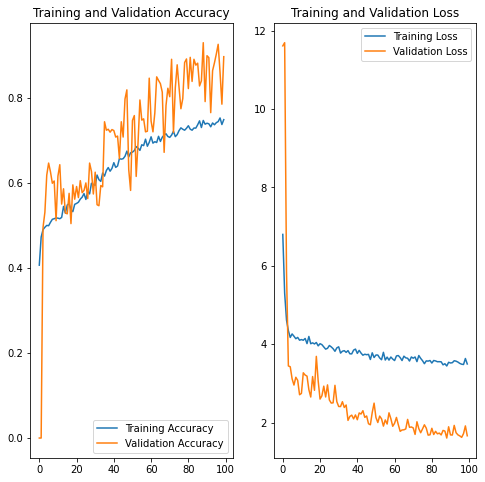

In [ ]:



# Fang et al Tinier-YOLO with data augmentation 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(1024, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),


  layers.Conv2D(256, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),

  layers.UpSampling2D(),

  layers.Conv2D(512, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),


  layers.Conv2D(64, 1, padding='same', activation='relu'),
  layers.Conv2D(64, 1, padding='same', activation='relu'),

  layers.Conv2D(1024, 1, padding='same', activation='relu'),
  layers.BatchNormalization(),




  layers.Dropout(0.2),
  layers.Flatten()
  
  
   
  
  
 ])




model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
keras.utils.plot_model(model, show_shapes=True)

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')



plt.show()




In [ ]:


from sklearn.metrics import confusion_matrix
 
preds = model.predict(val_ds)  # each row contains probability of the class
y_pred = np.argmax(preds,axis=-1)  # pick up the highest probability  and assign the class number
 
true_categories = np.concatenate([y for x, y in val_ds], axis=0)  # fetch true labels for each image
 

confusion = confusion_matrix(true_categories, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(true_categories, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(true_categories, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(true_categories, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(true_categories, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(true_categories, y_pred, average='weighted')))

Confusion Matrix

[[614  36]
 [100 558]]

Accuracy: 0.90

Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

Macro Precision: 0.90
Macro Recall: 0.90
Macro F1-score: 0.90

Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90


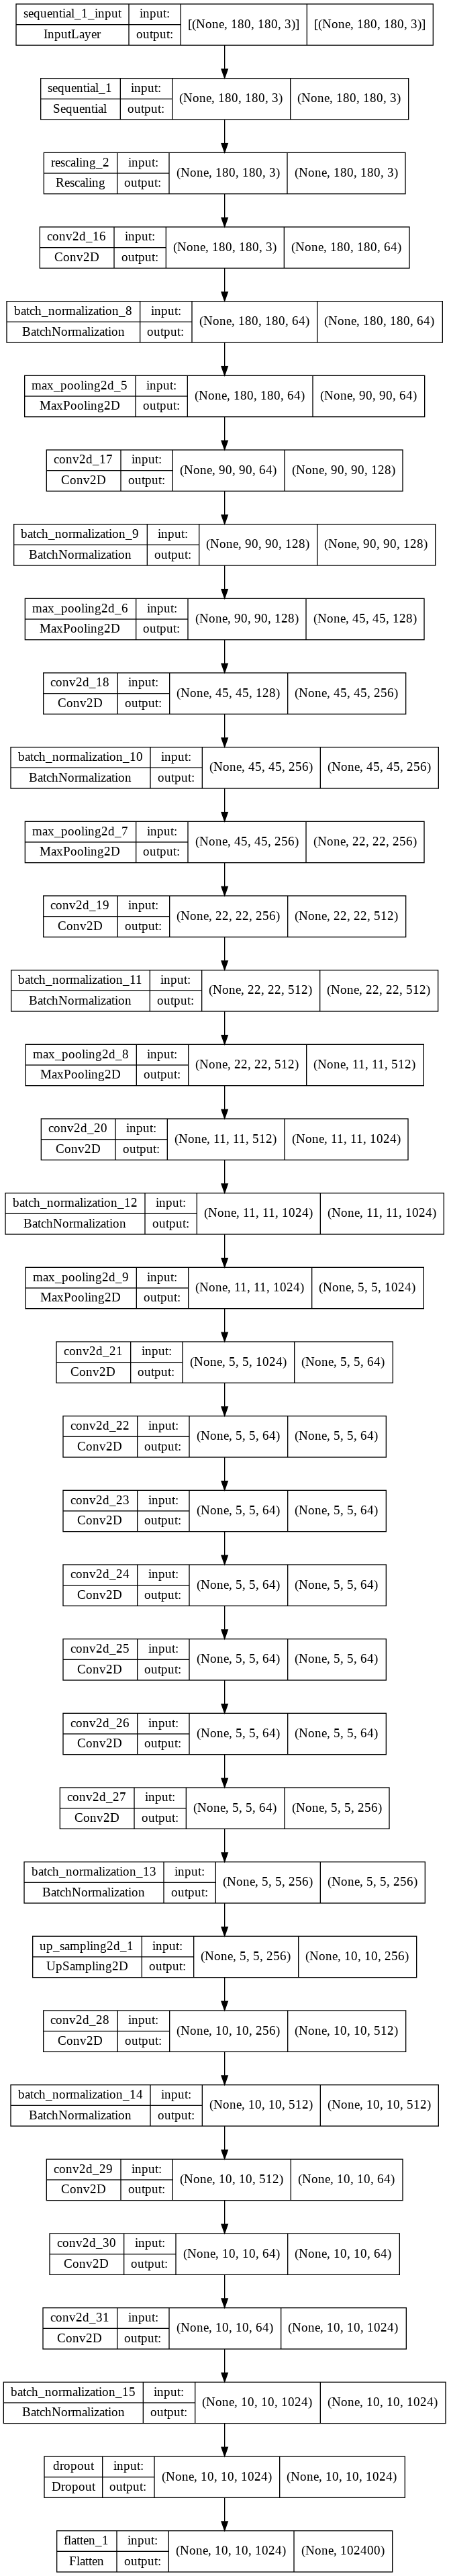

In [ ]:
keras.utils.plot_model(model, show_shapes=True)